## Data Cleaning

Techniques for cleaning & preparing data

### Learning Outcomes
- how to find & fix missing values
- how to simplify your data
- how to fix data-type problems
- how to work with indexes

In [1]:
!pip install pandas numpy seaborn matplotlib 


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("ODF_Fire_Data.csv")


In [4]:
#Quick Review How do I investiage this data?
df.describe(include="all")

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
count,23490.000000,23490,23490.00000,23490,23490,23490,23490,23490,23490,23411.000000,...,23401,23396,23490,23396,23395,23487,23490,23490.000000,23490.000000,23490
unique,NaN,1,NaN,3,14,31,23335,19637,7,NaN,...,7,20257,22822,22504,22304,11005,22865,NaN,NaN,1009
top,NaN,STAT,NaN,SOA,Southwest Oregon,Grants Pass,02-952017-03,Mill Creek,A,NaN,...,Does Not Apply - Eastern OR,07/15/2018 09:00:00 AM,08/17/2022 05:00:00 PM,08/17/2022 05:00:00 PM,12/31/2013 12:00:00 PM,08/19/2008 12:00:00 AM,10/26/2001 10:20:00 AM,NaN,NaN,018
freq,NaN,23490,NaN,12125,5975,3072,2,33,17013,NaN,...,6562,92,18,19,20,67,12,NaN,NaN,257
mean,90425.933461,NaN,2010.80132,NaN,NaN,NaN,NaN,NaN,NaN,270.802503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.754662,779.371052,NaN
std,20901.016028,NaN,6.73508,NaN,NaN,NaN,NaN,NaN,NaN,6816.736966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.618857,146.534574,NaN
min,57485.000000,NaN,2000.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,511.000000,NaN
25%,72508.500000,NaN,2005.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,711.000000,NaN
50%,88340.000000,NaN,2011.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,732.000000,NaN
75%,107432.500000,NaN,2017.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,954.000000,NaN


## Renaming Messy Columns

Convention says:

- Column names should be lowercase.
- Whitespace should be replaced with underscores (snake_case).



In [5]:
df_columns_renamed = df.rename(columns={
     
    "Serial": "serial_id",
    "FireCategory": "fire_category",
    "FireYear": "fire_year",
    "Area": "area_name",
    "DistrictName": "district_name",
    "UnitName": "unit_name",
    "FullFireNumber": "full_fire_number",
    "FireName": "fire_name",
    "EstTotalAcres": "estimated_total_acres",
    "ReportDateTime": "report_datetime",
    "CreationDate": "created_at",
    "ModifiedDate": "modified_at",
    "DistrictCode": "district_code",
    "UnitCode": "unit_code",
    "DistFireNumber": "district_fire_number"
})

df.columns = df_columns_renamed.columns.str.lstrip().str.rstrip().str.replace(' ', '_').str.lower()


In [6]:
df.head()

,serial_id,fire_category,fire_year,area_name,district_name,unit_name,full_fire_number,fire_name,size_class,estimated_total_acres,...,industrial_restriction,ign_datetime,report_datetime,discover_datetime,control_datetime,created_at,modified_at,district_code,unit_code,district_fire_number
0,102649,STAT,2015,EOA,Klamath-Lake,Klamath,15-981082-16,Bass 497,B,3.20,...,Does Not Apply - Eastern OR,09/02/2015 05:00:00 PM,09/02/2015 05:05:00 PM,09/02/2015 05:00:00 PM,09/02/2015 11:00:00 PM,09/05/2015 12:00:00 AM,10/13/2015 08:39:00 AM,98,981,082
1,131239,STAT,2022,EOA,Walker Range - WRFPA,Crescent,22-991220-23,Hay Fire,A,NaN,...,NaN,NaN,08/16/2022 06:56:00 PM,NaN,NaN,08/18/2022 12:00:00 AM,08/18/2022 09:11:00 AM,99,991,220
2,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
3,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
4,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133


In [7]:
df.isna().sum().sum()

np.int64(16012)

## Removing NaN

For the most part, removing NaN values is a good thing because it removes missing data that impacts your analysis.

You must decide whether you are:
- Removing an entire row if it contains a NaN
- Removing columns that contain a large amount of NaN values
- Remove only rows or columns that are completely NaN
Consider
- The amount of data lost
- Does the missing data have meaning
- Should you fill the NaN instead of removing the row completely 

In [8]:
print(df.shape)
# Removes NaN columns 
df_nan_removed = df.dropna(how='all', axis="columns")
# Removes rows where every value is NaN
df_nan_removed = df.dropna(how='all')
print(df_nan_removed.shape)
# What if we just removed all of the rows
df_no_nan_rows = df.dropna()
# We can't have over half of our dataset removed
print(df_no_nan_rows.shape)
# Investage the columns that have the highest number of NaN
print(df.isna().sum().sort_values(ascending=False))
#Drop the column(s) by name or by %
#df = df = df.loc[:, df.isna().mean() < 0.4]
df = df.drop(columns=["cause_comments"])


(23490, 38)
(23490, 38)
(9082, 38)
cause_comments            13685
landmarklocation           1282
specificcause               224
causeby                     128
control_datetime             95
discover_datetime            94
ign_datetime                 94
reguserestriction            89
industrial_restriction       89
estimated_total_acres        79
regusezone                   50
subdiv                       31
rng                          15
twn                          12
sec                          12
latlongdd                    10
long_dd                      10
lat_dd                       10
created_at                    3
serial_id                     0
fire_category                 0
fire_year                     0
unit_name                     0
district_name                 0
area_name                     0
fire_name                     0
size_class                    0
generalcause                  0
humanorlightning              0
full_fire_number              0
fo_la

In [9]:
df["specificcause"].unique()
df["causeby"].unique()            


array(['Other-Public', nan, 'Lightning', 'Motorist', 'Public Utility',
       'Recreationist', 'Ruralist-Paying', 'Hunter',
       'Other-Landowner Related', 'Transient', 'Other Forest Mgt. Worker',
       'Rancher-Farmer', 'Timber Harvest Worker', 'Ruralist-Non-Paying',
       'Hiker', 'Fisherman', 'Marijuana Grower'], dtype=object)

In [ ]:
# Fill NaN
df["specificcause"] = df["specificcause"].fillna("unknown")
df["causeby"] = df["causeby"].fillna("unknown")

In [ ]:
# Drop NaN
df = df.dropna()
print(df.shape)

(22092, 37)


In [ ]:
print(df.isna().sum().sort_values())

serial_id                 0
fire_category             0
fire_year                 0
area_name                 0
district_name             0
unit_name                 0
full_fire_number          0
fire_name                 0
size_class                0
estimated_total_acres     0
protected_acres           0
humanorlightning          0
causeby                   0
generalcause              0
specificcause             0
lat_dd                    0
long_dd                   0
latlongdd                 0
fo_landowntype            0
twn                       0
rng                       0
sec                       0
subdiv                    0
landmarklocation          0
county                    0
regusezone                0
reguserestriction         0
industrial_restriction    0
ign_datetime              0
report_datetime           0
discover_datetime         0
control_datetime          0
created_at                0
modified_at               0
district_code             0
unit_code           

## Your Turn: Remove NaN from Your Data

1. Investigate how many NaN values exist in each column.
2. Decide whether you will drop the column, replace the NaN values, or drop the rows containing NaN.
3. Update your dataset so that it contains no remaining NaN values.


## Updating Dates

You must convert your dates from strings into datetime objects.  
This allows you to use built-in date methods and perform time-based calculations.


In [14]:
df["ign_datetime"].head(20)
df["discover_datetime"].head(20)
df["control_datetime"].head(20)
df["report_datetime"].head(20)

0    2015-09-02 17:05:00
2    2000-07-19 13:20:00
3    2000-08-24 13:07:00
4    2001-08-10 17:47:00
6    2002-07-06 13:04:00
7    2003-08-22 05:00:00
8    2003-08-23 09:24:00
9    2003-08-30 14:37:00
10   2005-09-18 15:20:00
11   2005-08-26 23:29:00
12   2007-06-23 17:47:00
13   2014-08-25 13:15:00
15   2008-10-26 12:01:00
16   2008-08-17 21:15:00
18   2009-09-03 15:40:00
19   2009-08-01 19:59:00
21   2009-08-17 11:52:00
22   2009-07-15 05:30:00
24   2010-07-06 20:50:00
25   2010-07-09 11:53:00
Name: report_datetime, dtype: datetime64[ns]

In [15]:
date_columns = [
    "ign_datetime",
    "discover_datetime",
    "control_datetime",
    "report_datetime"
]

for col in date_columns:
    df[col] = pd.to_datetime(
        df[col],
        format="%Y-%m-%d %H:%M:%S",
        errors="coerce"
    )
df[[
    "ign_datetime",
    "discover_datetime",
    "control_datetime",
    "report_datetime"
]].dtypes

ign_datetime         datetime64[ns]
discover_datetime    datetime64[ns]
control_datetime     datetime64[ns]
report_datetime      datetime64[ns]
dtype: object

In [23]:
df["discovery_to_control"] = df["control_datetime"] - df["discover_datetime"]
df["discovery_to_control"]

0       0 days 06:00:00
2       0 days 11:35:00
3       8 days 08:23:00
4       0 days 00:45:00
6       0 days 00:05:00
              ...      
23485   0 days 05:13:00
23486   0 days 00:54:00
23487   3 days 04:25:00
23488   0 days 01:32:00
23489   0 days 01:07:00
Name: discovery_to_control, Length: 22092, dtype: timedelta64[ns]

## Your Turn: Update Your Dates

1. Check the format of your date columns.  
   - If the format is consistent, pass the specific format to `pd.to_datetime`.  
   - If the formats are inconsistent, use `format="mixed"`.
   - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
   

2. Convert your date columns using `pd.to_datetime`.


# Matrix linear transformations 
- When muliplying a vector by a matrix, you are applying linear transformation
- This is used in ML, Nerual Networks, and much more. 

In [18]:

matrices = [np.matrix([[0, 1], [1, 0]]), 
            np.matrix([[1, 0], [0, -1]]), 
            np.matrix([[-1, 0], [0, 1]]), 
            np.matrix([[3, 0], [0, 1]]), 
            np.matrix([[1, 0], [0, 3]]), 
            np.matrix([[3, 0], [0, 3]]), 
            np.matrix([[1, 3], [0, 1]]), 
            np.matrix([[1, 0], [3, 1]]), 
            np.matrix([[-1, 0], [0, -1]]), 
            np.matrix([[0, 1], [-1, 0]]), 
            np.matrix([[0, -1], [1, 0]]), ]

In [19]:

def plot_vectors(vector, vector_t, matrix):

    quiver = plt.quiver([0, 0], # Sets the x-cordinate of the start of the vectors
                    [0, 0], # Sets the y-cordinate of the start of the vectors
                    [vector[0], vector_t[0]], # Sets the x-cordinate of the end of the vectors
                    [vector[1], vector_t[1]], # Sets the y-cordinate of the end of the vectors
           angles='xy', 
           scale_units='xy', 
           scale=1,
           color=['r','b'])
    
    x_max = max(vector[0], vector_t[0]) + 1
    y_max = max(vector[1], vector_t[1]) + 1
    plt.xlim(-x_max, x_max)
    plt.ylim(-y_max, y_max)
    plt.quiverkey(quiver, *(vector-0.5*vector), 1, f'orginal vector {vector}', coordinates='data')
    plt.quiverkey(quiver, *(vector_t-0.5*vector_t), 1, f'transformed vector {vector_t}', coordinates='data')
    plt.title(f'Transformation for {matrix}')
    plt.show()

Original Vector 1: [8 9], Transformed Vector 1: [9 8]


/root/work/450DataDev/450DataScienceDevWinter2026LectureCode/Week2/Solution/venv/lib/python3.12/site-packages/matplotlib/quiver.py:648: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


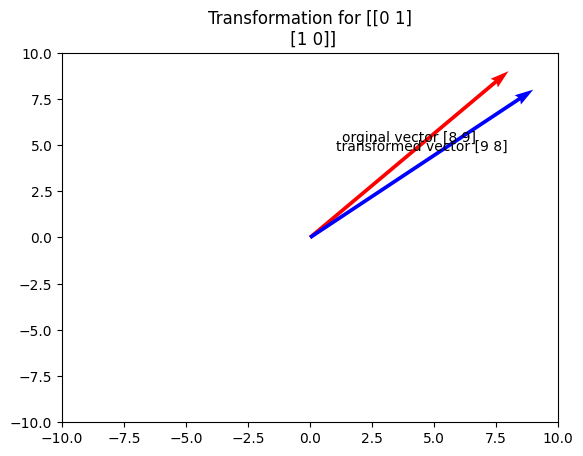

Original Vector 2: [5 4], Transformed Vector 2: [4 5]


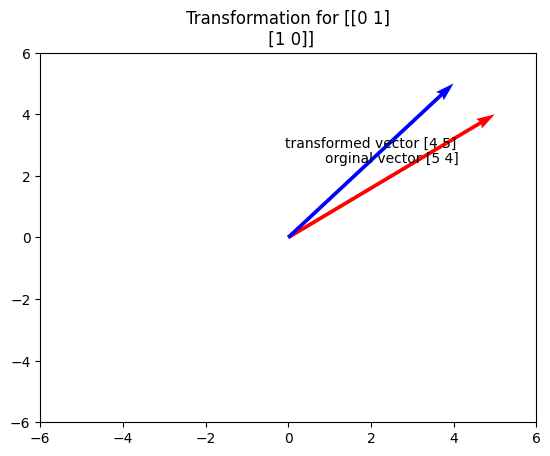

Original Vector 1: [8 9], Transformed Vector 1: [ 8 -9]


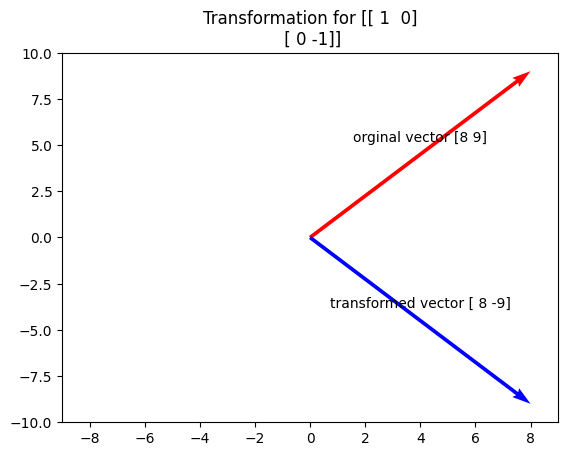

Original Vector 2: [5 4], Transformed Vector 2: [ 5 -4]


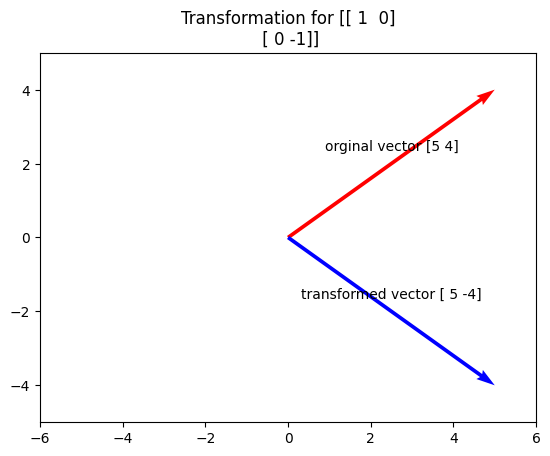

Original Vector 1: [8 9], Transformed Vector 1: [-8  9]


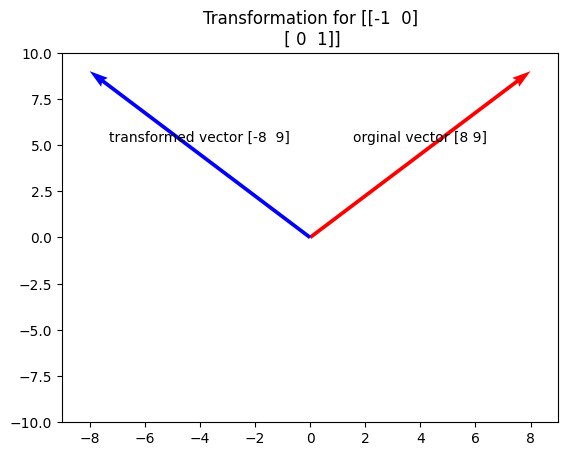

Original Vector 2: [5 4], Transformed Vector 2: [-5  4]


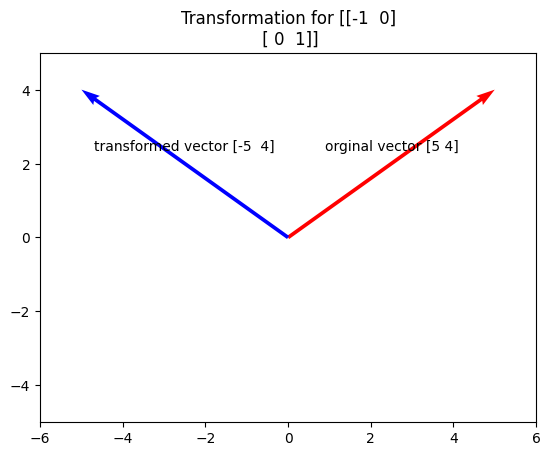

Original Vector 1: [8 9], Transformed Vector 1: [24  9]


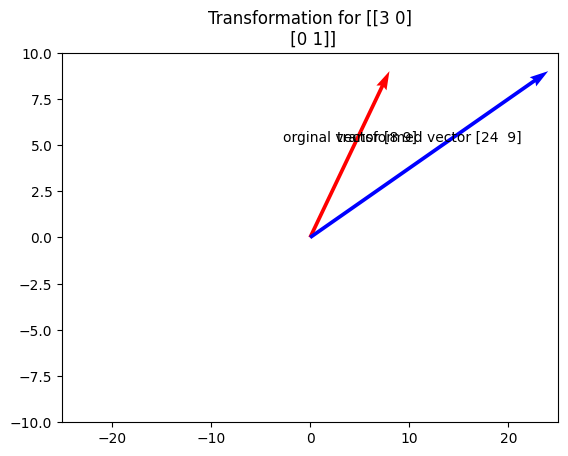

Original Vector 2: [5 4], Transformed Vector 2: [15  4]


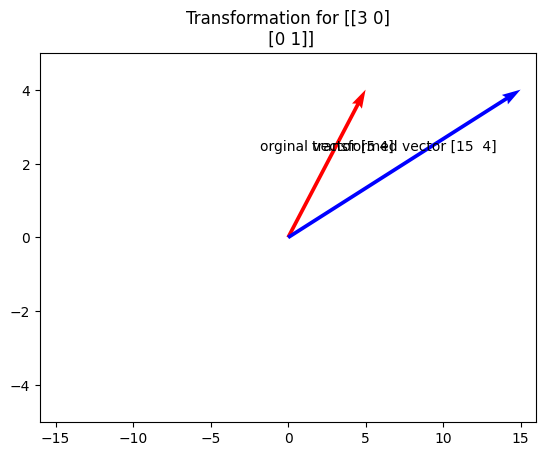

Original Vector 1: [8 9], Transformed Vector 1: [ 8 27]


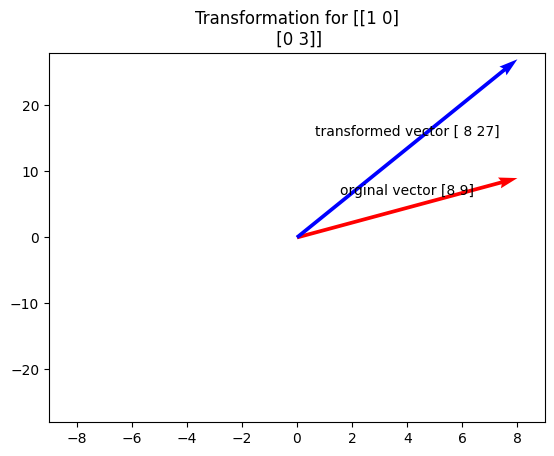

Original Vector 2: [5 4], Transformed Vector 2: [ 5 12]


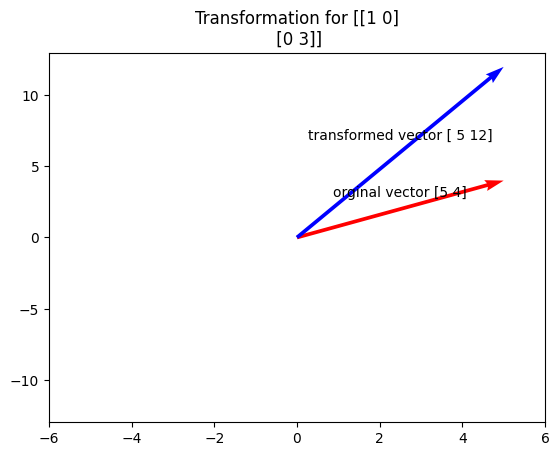

Original Vector 1: [8 9], Transformed Vector 1: [24 27]


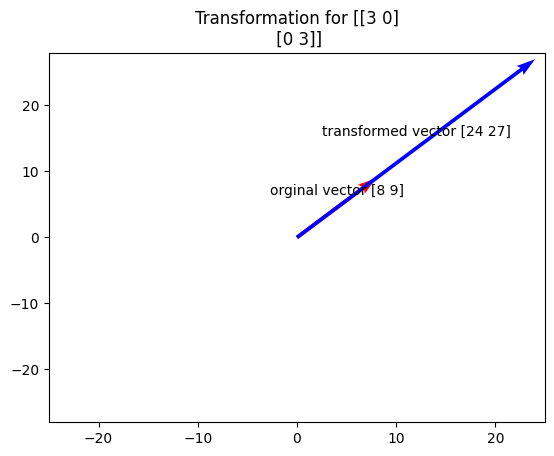

Original Vector 2: [5 4], Transformed Vector 2: [15 12]


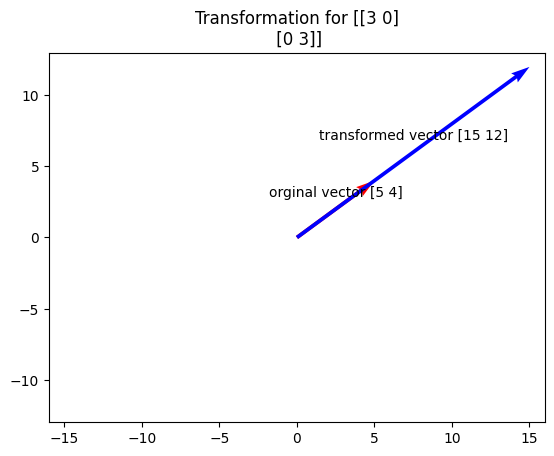

Original Vector 1: [8 9], Transformed Vector 1: [ 8 33]


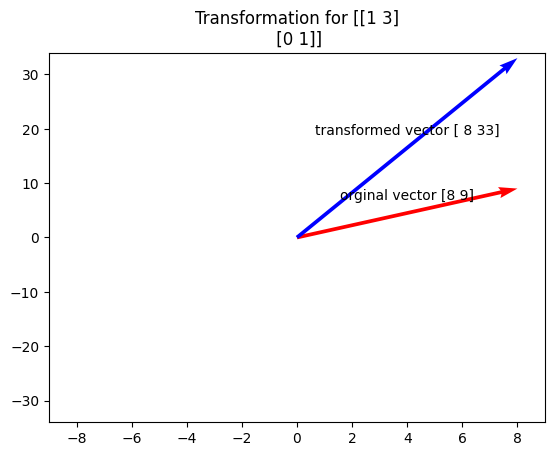

Original Vector 2: [5 4], Transformed Vector 2: [ 5 19]


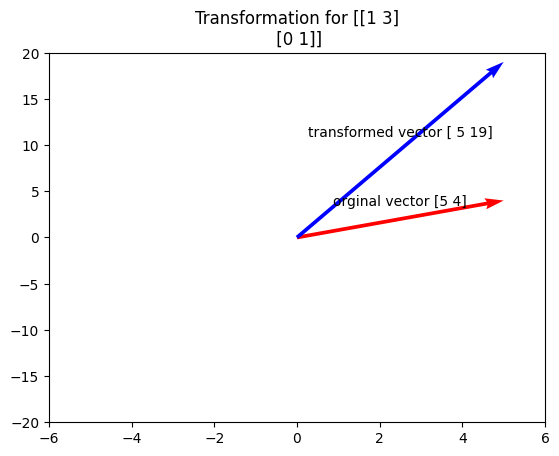

Original Vector 1: [8 9], Transformed Vector 1: [35  9]


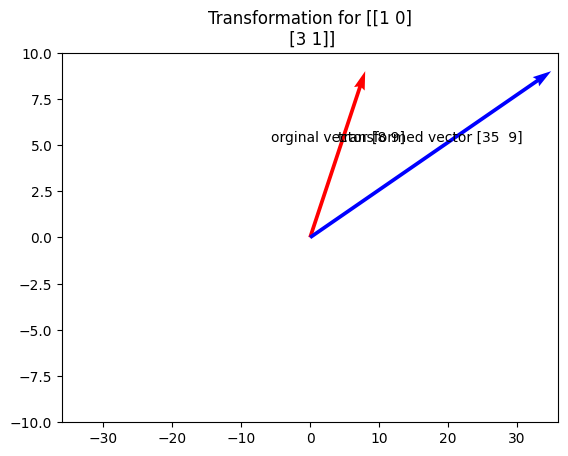

Original Vector 2: [5 4], Transformed Vector 2: [17  4]


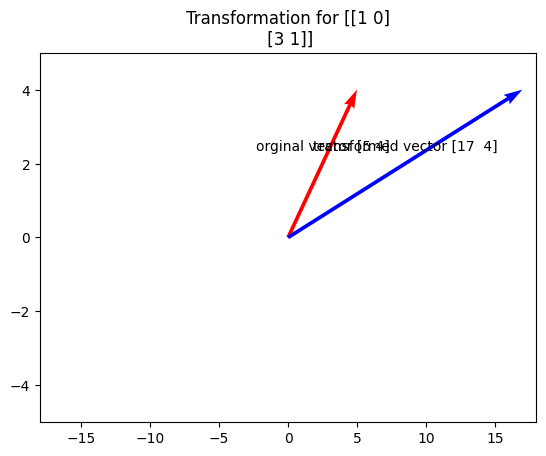

Original Vector 1: [8 9], Transformed Vector 1: [-8 -9]


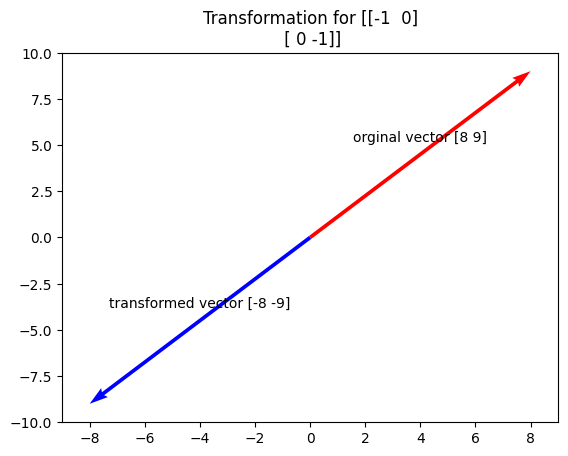

Original Vector 2: [5 4], Transformed Vector 2: [-5 -4]


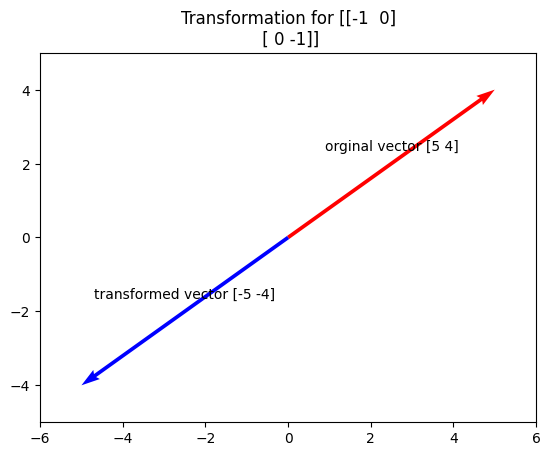

Original Vector 1: [8 9], Transformed Vector 1: [-9  8]


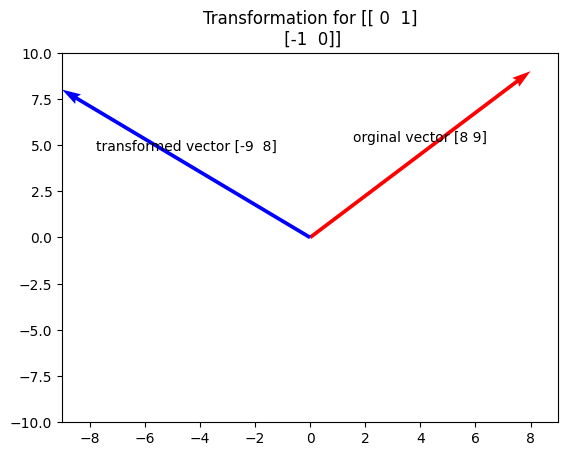

Original Vector 2: [5 4], Transformed Vector 2: [-4  5]


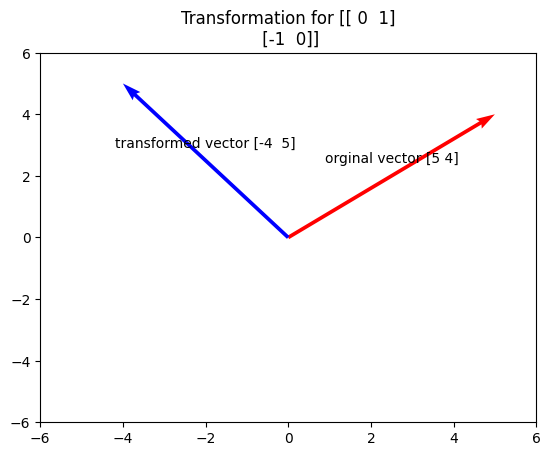

Original Vector 1: [8 9], Transformed Vector 1: [ 9 -8]


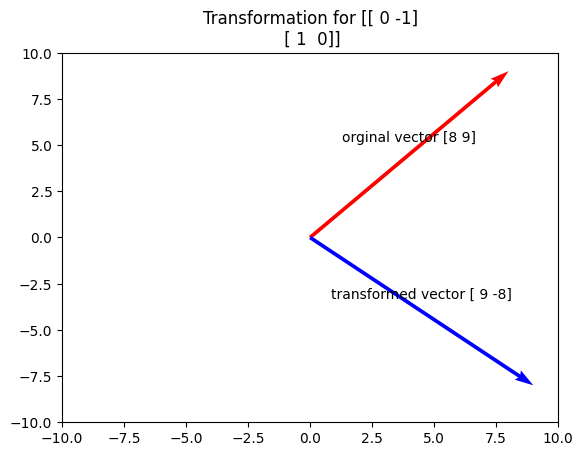

Original Vector 2: [5 4], Transformed Vector 2: [ 4 -5]


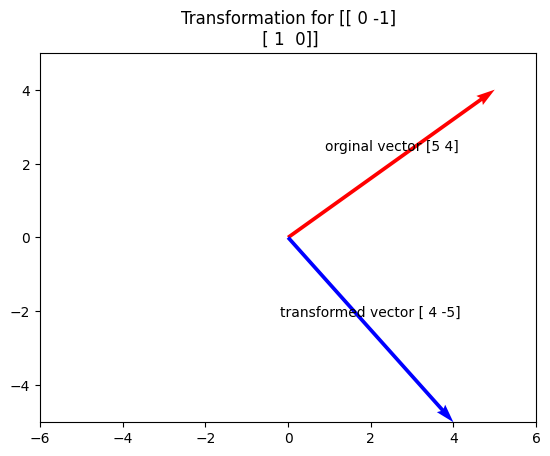

In [20]:


vector_1 = np.random.randint(0, 10, 2)
vector_2 = np.random.randint(0, 10, 2)



for matrix in matrices:
    vector_1_t = (vector_1*matrix).A[0]
    print(f"Original Vector 1: {vector_1}, Transformed Vector 1: {vector_1_t}")
    plot_vectors(vector_1, vector_1_t, matrix)

    vector_2_t = (vector_2*matrix).A[0]
    print(f"Original Vector 2: {vector_2}, Transformed Vector 2: {vector_2_t}")
    plot_vectors(vector_2, vector_2_t, matrix)

# Transpose of a Product - LIVE EVIL
If you transpose a matrix product, the order reverses and every matrix gets transposed.

In [21]:
m_L = np.random.rand(2, 6)  
m_I = np.random.rand(6, 3)  
m_V = np.random.rand(3, 5)  
m_E = np.random.rand(5, 2)  

product = m_L@m_I@m_V@m_E
transposed_product = product.T
print(f'''
Transposed Product: 
{transposed_product}''')

Lt = m_L.T
It = m_I.T
Vt = m_V.T
Et = m_E.T

#Gives Error for wrong shape
#manual_result_inorder = Lt@It@Vt@Et
#print(f'Manual Result: {manual_result_inorder}')

manual_result_reverse = Et@Vt@It@Lt
print(f'''
Manual Result LIVEEVIL: 
{manual_result_reverse}
''')

print(np.allclose(transposed_product, manual_result_reverse))


Transposed Product: 
[[7.57812269 8.26196914]
 [7.73989484 8.3635848 ]]

Manual Result LIVEEVIL: 
[[7.57812269 8.26196914]
 [7.73989484 8.3635848 ]]

True


In [22]:
m_L = np.random.rand(3, 3)  
m_I = np.random.rand(3, 3)  
m_V = np.random.rand(3, 3)    
m_E = np.random.rand(3, 3)    

product = m_L@m_I@m_V@m_E
transposed_product = product.T
print(f'''
Transposed Product: 
{transposed_product}''')

Lt = m_L.T
It = m_I.T
Vt = m_V.T
Et = m_E.T

#Can do this with square matrices but not correct
manual_result_inorder = Lt@It@Vt@Et
print(f'''
Manual Result: 
{manual_result_inorder}''')

manual_result_reverse = Et@Vt@It@Lt
print(f'''
Manual Result LIVEEVIL: 
{manual_result_reverse}
''')

print(np.allclose(transposed_product, manual_result_reverse))


Transposed Product: 
[[2.29223952 2.53889892 1.17669905]
 [1.65707716 1.83385569 0.84934156]
 [2.61355966 2.8904742  1.33794645]]

Manual Result: 
[[0.16139259 2.44275523 2.39242977]
 [0.25954512 3.90117638 3.83240388]
 [0.14441668 2.1798522  2.13746779]]

Manual Result LIVEEVIL: 
[[2.29223952 2.53889892 1.17669905]
 [1.65707716 1.83385569 0.84934156]
 [2.61355966 2.8904742  1.33794645]]

True
